### Unsupervised Learning: Prediction using K-Means clustering

## Author: **Utsav Shah**

In [39]:
# Installing dependencies for ggplot

!pip install ggplot

In [40]:
# Importing dependencies

import pandas as pd  # To convert the raw data into a dataframe
from ggplot import *  # For graphical visualizations
from sklearn import datasets  # For Iris Dataset
from sklearn.cluster import KMeans  # Our classification model
import time  # To know the time performance our our model.

In [41]:
# Loading the data

iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [42]:
# Splitting the feature values into a variable

features = iris_df.iloc[:, [0,1,2,3]].values

In [43]:
t0 = time.time()
squared_error = []  # Square error values for chart

# Finding the optimal number of clusters using the elbow method
for i in range(1,15):
  kmeans = KMeans(
      n_clusters = i,
      init = 'k-means++',
      n_init = 10,
      max_iter = 300,
      tol = 0.01,
      n_jobs = -1
  )
  kmeans.fit(features)
  squared_error.append(kmeans.inertia_)

print("Time taken to output", time.time() - t0)

Time taken to output 1.5605981349945068


In [44]:
# Preparing the data for graphical visualization of optimal number of clusters

graph_data = list(zip(range(1,15), squared_error))
df = pd.DataFrame(graph_data, columns=['range', 'cost'])

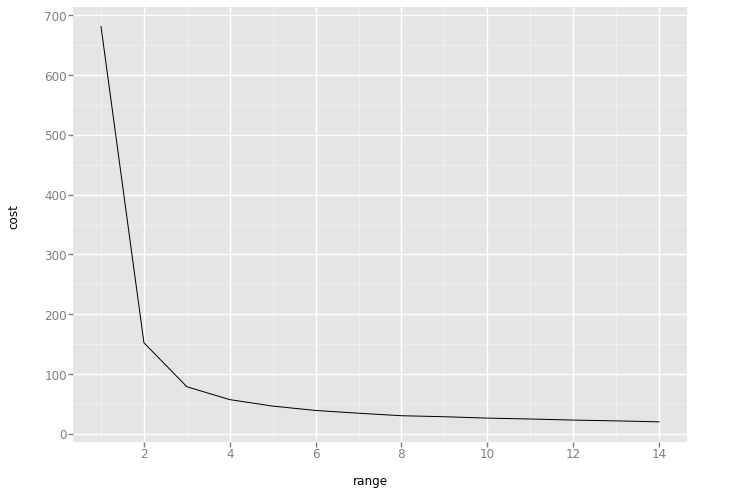

<ggplot: (8750061028798)>

In [45]:
# Visualizing the graph

ggplot(df, aes(x='range',y='cost')) + \
geom_line()

#### Found the optimal number of clusters using the elbow method
#### (You now know why is it called elbow method)
#### As seen from the above graph, the optiaml number of clusters is 3

In [46]:
# Fitting our data into our K-Means model with the required parameters

kmeans=KMeans(
    n_clusters=3,
    init = 'random',
    n_init = 10,
    max_iter = 300,
    tol = 0.01,
    n_jobs = -1)
y=kmeans.fit_predict(features)

# The centers of the predicated clusters are stored
print("The cluster centers for our model are:\n", kmeans.cluster_centers_)

The cluster centers for our model are:
 [[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]


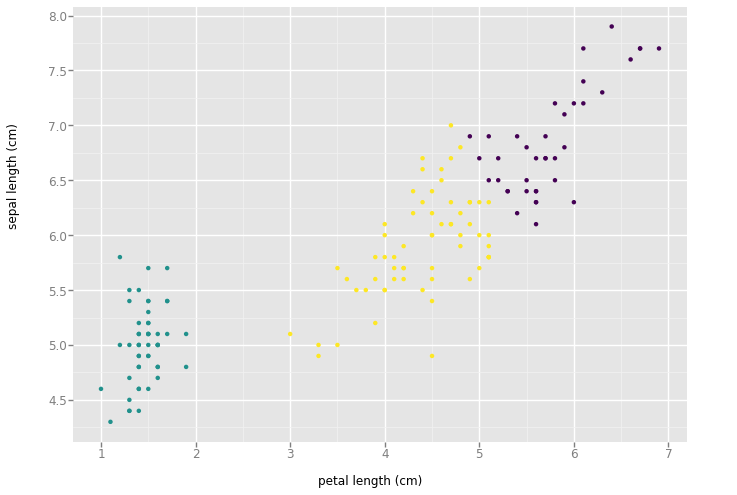

<ggplot: (8750060900209)>

In [47]:
# Visualizing the clusters formed graphically

ggplot(iris_df, aes('petal length (cm)', 'sepal length (cm)')) +\
scale_color_brewer(type='seq', palette=1) + \
geom_point('petal length (cm)', 'sepal length (cm)',color=y)